<a href="https://colab.research.google.com/github/Ica1234/Tugas-Pembelajaran-Mesin/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
gender = pd.read_csv('/content/gender.csv')

In [ ]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
gender.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [ ]:
x = gender[['forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','lips_thin','distance_nose_to_lip_long']]
y = gender ['gender']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y,test_size=0.1, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model = tree_model.fit(x_train, y_train)



In [ ]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('accuracy:', acc_score)

accuracy: 0.962


In [ ]:
# Membuat prediksi menggunakan model tree_model
predictions = tree_model.predict(x_test)


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file="gender_eda.dot",
                feature_names=['forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','lips_thin','distance_nose_to_lip_long'],
                class_names=['male','female'],
                rounded=True,
                filled=True)

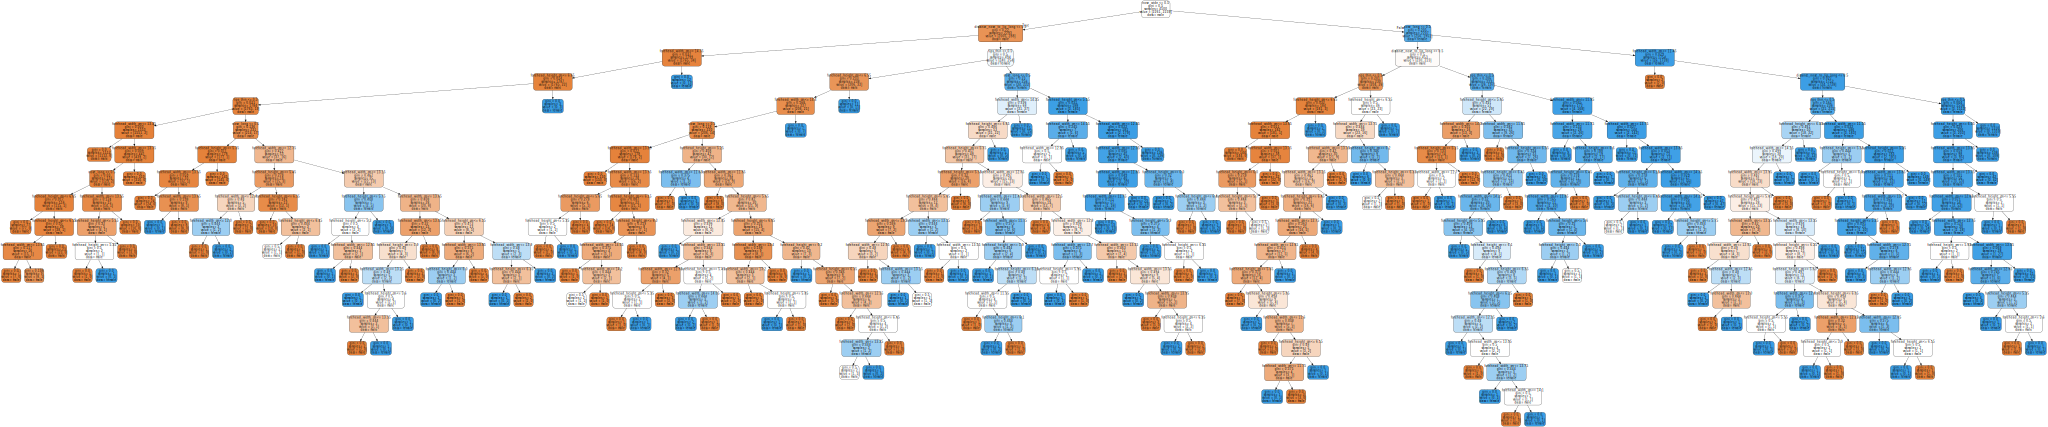

In [ ]:
import graphviz
with open("gender_eda.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
graph = graphviz.Source(dot_graph)
graph.render(filename='decision_tree', format='png', cleanup=True)


'decision_tree.png'